
# PyQSpecFit
This is a tutorial notebook for __[PyQSpecFit](https://github.com/samlaihei/PyQSpecFit)__, a flexible and user-friendly code designed for spectral modelling emission features in QSO spectra or continuum-subtracted spectra. The key features of this code are:
-  Fit the QSO continuum with a combined pseudo-continuum model composed of a power-law, Balmer continuum, and FeII flux. We include four main semi-empirical and empirical FeII templates.
-  Fit line complexes with a user-defined number of broad and narrow Gaussians profiles. 
-  Measure properties of the modelled lines (integrated flux, EW, FWHM, line dispersion, peak, wavelength shift, etc). Realistic uncertainties can be obtained by using the error spectrum to resample and re-fit the data.
-  Plot the data with the modelled continuum and emission-line profiles. 

### Installation
The recommended installation method is to use conda virtual environments. The __[environment.yml](https://github.com/samlaihei/PyQSpecFit/blob/main/environment.yml)__ file is provided for quick setup. Navigate to your designated installation directory and run in the terminal,
```
git clone https://github.com/samlaihei/PyQSpecFit.git
cd PyQSpecFit
conda env create -f environment.yml
```
which will install all required packages and dependencies. The code was tested on Python 3.6 and Python 3.11.


### Features 
-  Fit one line complex or simultaneously fit many line complexes with multiple Gaussian components with user-defined fitting thresholds. Realistic errors can be measured by perturbing the data with the error spectrum.
-  At least 4 semi-empirical and empirical FeII templates for the QSO pseudocontinuum, along with a power-law and Balmer component. The multiple FeII templates can be used to inform the systematic uncertainty.
-  Sigma clipping and/or smoothing can be used to remove/minimise the effects of narrow features which may influence the measurement of an intrinsic line model. It's also used to dampen noise. The sigma-clipping can also be set to remove the base of absorption features by defining a buffer zone.
-  Continuum-fitting and line-fitting regions is fully customisable, so it is simple to mask particular regions (e.g. telluric regions) from fitting.
-  Properties of the desired line model (which can be composed of multiple Gaussians) can easily be evaluated. Narrow/broad components of the same line can be evaluated together or separately.
-  Results of the line and continuum fits are saved to file and can be retrieved, re-evaluated, or re-plotted at any time.
-  Plotting routine is customisable, and allows the user to design the plots separately before feeding the matplotlib axes class to the plotting method. 
-  Although not supported by default, it is straightforward to modify the code to attempt to fit absorption lines. Skewed Gaussian profiles are also supported, but is turned off by default in favour of the multiple Gaussian approach.
-  _Most_ of the fitting parameters can be customised in a single .csv file, with each row a different run, making it trivial to fit multiple different targets quickly or the same target in different ways.  

### Authors
__[Samuel Lai](https://orcid.org/0000-0001-9372-4611)__; samuel.lai(at)anu.edu.au (Australian National University)

### Acknowledgements
If you found this code useful in any capacity, we would appreciate it if you could cite us. Please refer to the __[README.md](https://github.com/samlaihei/PyQSpecFit)__ in the repository for the most up-to-date citation.


### General Usage Procedure
1. You may wish to apply extinction correction or galaxy decomposition prior to using your spectrum as an input for this code. 
1. Place your data in the __[data/](https://github.com/samlaihei/PyQSpecFit/tree/main/data)__ Directory in .csv format. The Wavelength axis should be in the rest-frame and in units of angstroms. The Flux and eFlux axis are in units of erg/s/cm^2/Angstrom and should be in the observed frame.
1. Determine which lines you would like to fit, using one of the existing line files in the __[Lines/](https://github.com/samlaihei/PyQSpecFit/tree/main/Lines)__ Directory or create your own. 
1. Create a runFile in the __[Run_Files/](https://github.com/samlaihei/PyQSpecFit/tree/main/Run_Files)__ Directory. This is a .csv file with most of the parameters an average user would need to customise the fit. This file contains the following columns:
    -  runName - ID used to keep track of run. This determines the name of the output file and if two rows are given the same name, their results will be concatenated and treated as the same run.
    -  Datafile - location of the data file
    -  LineFile - location of the line file
    -  redshift - redshift of the target, used primarily to calculate luminosity.
    -  N_fits - number of fits to perform in this run. If > 1, the spectrum will be resampled based on its error.
    -  ContiWindows - relatively line-free continuum fitting windows
    -  LineWindows - wavelength regions used to fit the lines, can have more than one.
    -  useBalmer, useFe - toggles to use the Balmer continuum or the FeII models for the pseudo-continuum
    -  Fe_uv, Fe_opt - index of the FeII models, each go up to 3. 
    -  lineShift - global shift of the location of the lines, useful if redshift is incorrect, but usually should not be used. Rather, update the redshift and start the fits over again.
    -  smoothStddev - standard deviation for smoothing. Smoothing is on if > 0.
    -  clipStddev, clipBoxWidth, clipBufferWidth - parameters for sigma-clipping prior to fitting. Sigma-clipping is on if clipStddev > 0.
    -  plotWindow - plotting range, only one range is allowed.
    -  lineComplexInd - index of the line complex of interest. The index is determined by the LineFile.
1. The file can be run following __[example.py](https://github.com/samlaihei/PyQSpecFit/blob/main/example.py)__. In its simplest form, it is:

```python
import PyQSpecFit
file = 'Run_Files/runFile.csv'
example = PyQSpecFit.PyQSpecFit()
example.runFile(file)
```


## Getting Started
In this example, we have provided UV-optical QSO data of one target. We want to fit the MgII line using three broad components and one narrow component, which is described in __[Lines/Lines_MgII.csv](https://github.com/samlaihei/PyQSpecFit/blob/main/Lines/Lines_MgII.csv)__. We then create the runFile, __[Run_Files/runFile.csv](https://github.com/samlaihei/PyQSpecFit/blob/main/Run_Files/runFile.csv)__, filling in the required columns. We are interested in the total broad line profile, so we choose lineComplexInd = 0, as the three broad lines of MgII are associated by the _Name_ column (the narrow component would be lineComplexInd = 1). We also repeat the run with a different runID to show how multiple targets could be fit.

We then show how to use the runFile using __[example.py](https://github.com/samlaihei/PyQSpecFit/blob/main/example.py)__, which we also show below. The key method is runFile().


Text(0, 0.5, '$\\rm f_{\\lambda, \\rm{obs}}$ ($\\rm erg\\;s^{-1}\\;cm^{-2}\\;\\AA^{-1}$)')

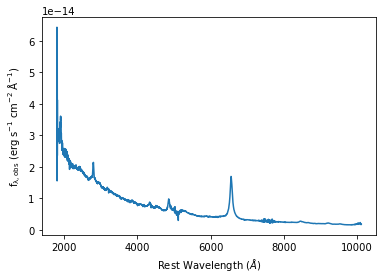

In [1]:
# Look at the data #
import matplotlib.pyplot as plt
import pandas

datafile = 'data/example.csv'
pdata = pd.read_csv(datafile)
lams, flux, eflux = [pdata[i].to_numpy() for i in pdata]
fig, ax = plt.subplots()
ax.plot(lams, flux)
ax.set_xlabel('Rest Wavelength ($\\AA$)')
ax.set_ylabel(r'$\rm f_{\lambda, \rm{obs}}$ ($\rm erg\;s^{-1}\;cm^{-2}\;\AA^{-1}$)')


In [1]:
import PyQSpecFit
file = 'Run_Files/runFile.csv'
example = PyQSpecFit.PyQSpecFit()

In [3]:
%%capture 
# Suppress the stdout statements which may be useful in practice, 
# especially when run from terminal, but fills up the notebook

example.runFile(file)


The above code creates and updates two files in __[Line_Params/](https://github.com/samlaihei/PyQSpecFit/tree/main/Line_Params)__ with filenames that match the runName column. To evaluate the line properties of the broad line and plot the fit, we use a few additional methods, namely evalFile() and plotFile(). Respectively, these two methods use the runName to create a table of line properties in __[Line_Properties/](https://github.com/samlaihei/PyQSpecFit/tree/main/Line_Properties)__ and figures in __[Fit_Figs/](https://github.com/samlaihei/PyQSpecFit/tree/main/Fit_Figs)__. The plots will use the default design.

In [3]:
# Evaluate line properties #
example.evalFile(file)

In [2]:
%%capture 
# Plot Figures #
example.plotFile(file)

Example Figure:
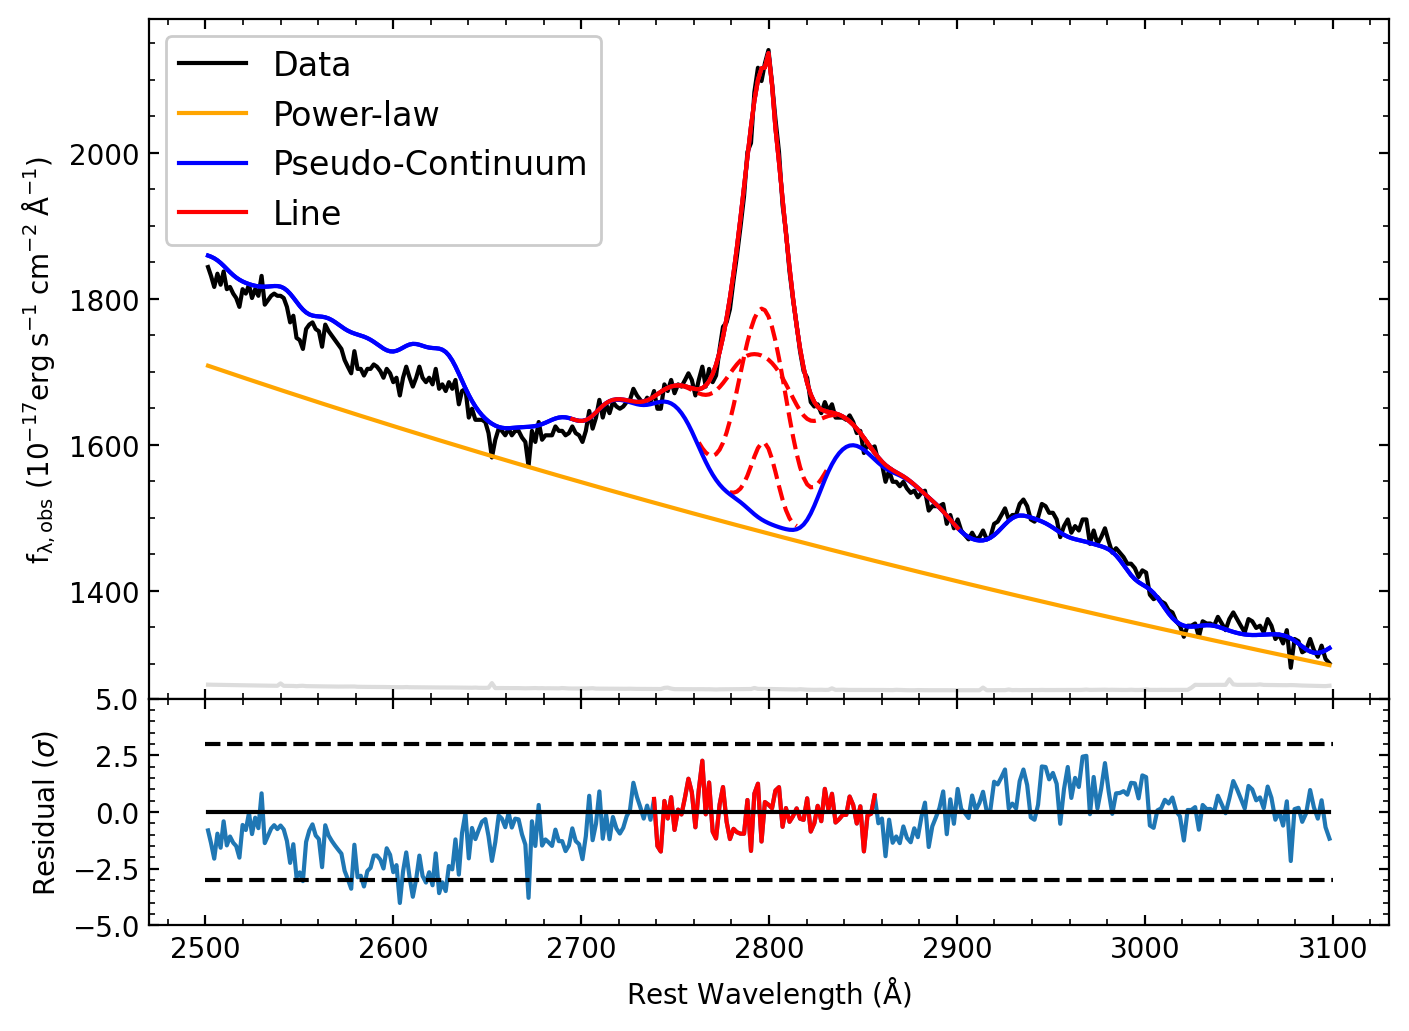